Prepulse waveform stimulation
=============================

Subthreshold pre-pulses change the initial state of an axon membrane and thus can be used to control its excitability. Depolarizing pre-pulse generate a transient decrease in excitability (i.e. virtually increases the fiber's threshold). This script illustrates this principle

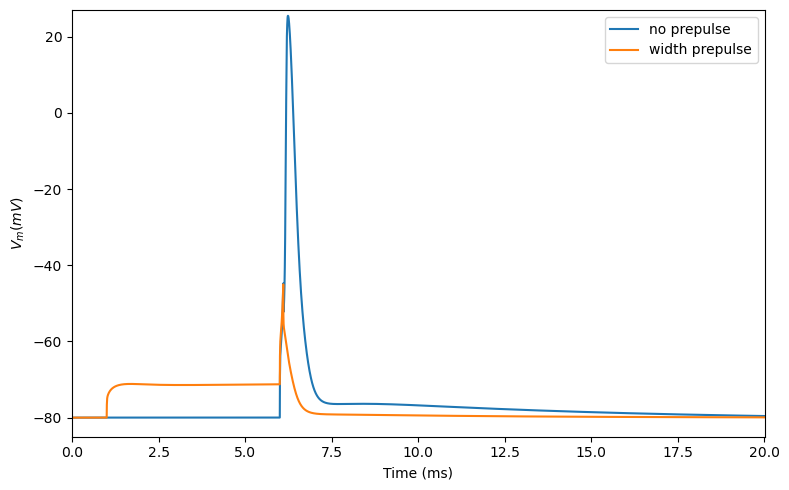

In [1]:
import nrv
import numpy as np
import matplotlib.pyplot as plt

model = 'MRG'
diam = 10
y = 0
z = 0
n_node = 20

t_sim = 20
t_start = 1
prep_d = 5
prep_a = 15
coeffs = [0, 1]
labels = ['no prepulse', 'width prepulse']
Vm = []
interp_delay = 0
pw = 100e-3
amp = 48

nseg = 1
material = nrv.load_material('endoneurium_bhadra')
L=nrv.get_length_from_nodes(diam,n_node)


for coeff in coeffs:
    prepulse = nrv.stimulus()
    prepulse.biphasic_pulse(t_start,prep_a,prep_d,0,0)
    pulse = nrv.stimulus()
    pulse.biphasic_pulse(t_start+interp_delay+prep_d,amp,pw,0,0)
    stim_1 = coeff*prepulse + pulse

    axon = nrv.myelinated(y,z,diam,L,rec='nodes',dt=0.005,Nseg_per_sec=nseg,model=model) 

    y_elec = 500
    z_elec = 0
    x_elec = axon.x_nodes[np.int32(n_node/2)]	# electrode y position, in [um]
    E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)

    stim_extra = nrv.stimulation(material)
    stim_extra.add_electrode(E1,stim_1)
    axon.attach_extracellular_stimulation(stim_extra)

    # simulate axon activity
    results = axon.simulate(t_sim=t_sim)
    Vm.append(results['V_mem'][10])
    del axon

plt.figure(figsize=(8,5))
for i in range(len(Vm)):
    plt.plot(results['t'], Vm[i],label=labels[i])
plt.ylabel(r"$V_m (mV)$")
plt.xlabel("Time (ms)")
plt.legend()

plt.xlim(np.min(results['t']),np.max(results['t']))
plt.ylim(-85,27)
plt.tight_layout()
#plt.show()